In [1]:
!python -m pip install pandas numpy matplotlib seaborn 



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\Nevaf\AppData\Local\Python\pythoncore-3.14-64\python.exe -m pip install --upgrade pip


The below specifies the packages we need to download

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image, ImageEnhance

This chunk extracts the data from the zip file, and saves it into a "raw data" file on my laptop.

In [3]:
import os
import zipfile

# 1. Change working directory
os.chdir("C:/Projects/DST_Project2")
print("Current directory:", os.getcwd())

# 2. Path to ZIP file
zip_path = "C:/Projects/DST_Project2/traffic_raw.zip"  # <-- full path including .zip

# 3. Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("C:/Projects/DST_Project2/data/raw")  # Extract to folder
print("ZIP extracted successfully!")

Current directory: C:\Projects\DST_Project2
ZIP extracted successfully!


I'm first going to look at the CSV files for EDA. The data is spilt into Meta: a clear graphic of the sign , and Test and Train data - all photographs.

In [4]:
data_dir = "data/raw"

#Load in the first csv files
meta_df = pd.read_csv(os.path.join(data_dir, "Meta.csv"))
test_df = pd.read_csv(os.path.join(data_dir, "Test.csv"))
train_df = pd.read_csv(os.path.join(data_dir, "Train.csv"))

# View the first few rows
print("Meta.csv:")
display(meta_df.head())

print("\nTrain.csv:")
display(train_df.head())

print("\nTest.csv:")
display(test_df.head())

#Look at number of rows, columns and data types
print("Meta.csv info:")
meta_df.info()
print("\nTrain.csv info:")
train_df.info()
print("\nTest.csv info:")
test_df.info()



Meta.csv:


Path  ClassId  ShapeId  ColorId SignId
0  Meta/27.png       27        0        0   1.32
1   Meta/0.png        0        1        0   3.29
2   Meta/1.png        1        1        0   3.29
3  Meta/10.png       10        1        0   3.27
4  Meta/11.png       11        0        0   1.22


Train.csv:


Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0     27      26       5       5      22      20       20   
1     28      27       5       6      23      22       20   
2     29      26       6       5      24      21       20   
3     28      27       5       6      23      22       20   
4     28      26       5       5      23      21       20   

                             Path  
0  Train/20/00020_00000_00000.png  
1  Train/20/00020_00000_00001.png  
2  Train/20/00020_00000_00002.png  
3  Train/20/00020_00000_00003.png  
4  Train/20/00020_00000_00004.png


Test.csv:


Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0     53      54       6       5      48      49       16  Test/00000.png
1     42      45       5       5      36      40        1  Test/00001.png
2     48      52       6       6      43      47       38  Test/00002.png
3     27      29       5       5      22      24       33  Test/00003.png
4     60      57       5       5      55      52       11  Test/00004.png

Meta.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Path     43 non-null     object
 1   ClassId  43 non-null     int64 
 2   ShapeId  43 non-null     int64 
 3   ColorId  43 non-null     int64 
 4   SignId   42 non-null     object
dtypes: int64(3), object(2)
memory usage: 1.8+ KB

Train.csv info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB

Test.csv info:
<class 'panda

Import the image files

In [5]:
data_dir = "data/raw/Train"


classes = sorted(os.listdir(data_dir))
print("Number of classes:", len(classes))
print(classes[:43])


Number of classes: 43
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '5', '6', '7', '8', '9']


Count how many images per class - compare to the data from the csv files that gracie has looked at in the report

In [6]:
image_count = {}
for c in classes:
    folder = os.path.join(data_dir, c)
    image_count[c] = len(os.listdir(folder))

image_count


{'0': 211,
 '1': 2221,
 '10': 2010,
 '11': 1320,
 '12': 2100,
 '13': 2160,
 '14': 780,
 '15': 630,
 '16': 420,
 '17': 1110,
 '18': 1200,
 '19': 210,
 '2': 2250,
 '20': 360,
 '21': 330,
 '22': 390,
 '23': 510,
 '24': 270,
 '25': 1500,
 '26': 600,
 '27': 240,
 '28': 540,
 '29': 270,
 '3': 1410,
 '30': 450,
 '31': 780,
 '32': 240,
 '33': 689,
 '34': 420,
 '35': 1200,
 '36': 390,
 '37': 210,
 '38': 2070,
 '39': 300,
 '4': 1980,
 '40': 360,
 '41': 240,
 '42': 240,
 '5': 1860,
 '6': 420,
 '7': 1440,
 '8': 1410,
 '9': 1470}

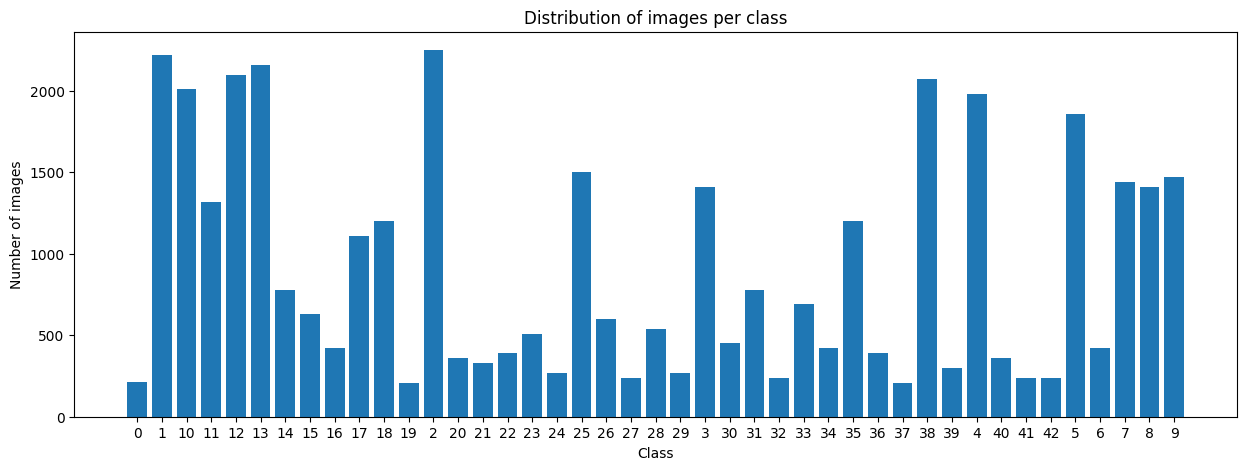

In [7]:
plt.figure(figsize=(15,5))
plt.bar(image_count.keys(), image_count.values())
plt.title("Distribution of images per class")
plt.xlabel("Class")
plt.ylabel("Number of images")
plt.show()


above done already by gracie - EDA for Class Imbalance

now look at random images to get an idea of the data set. 

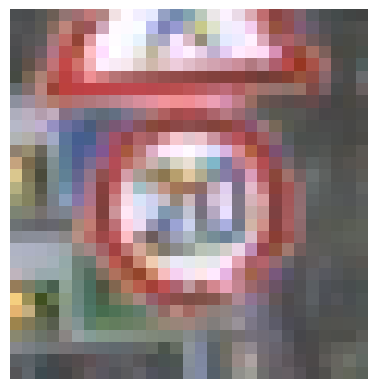

In [11]:
image_files = [
    f for f in os.listdir(os.path.join(data_dir, "0"))
    if not f.startswith(".") 
]

sample_path = os.path.join(data_dir, "0", image_files[0])
img = Image.open(sample_path)
plt.imshow(img)
plt.axis('off')
plt.show()

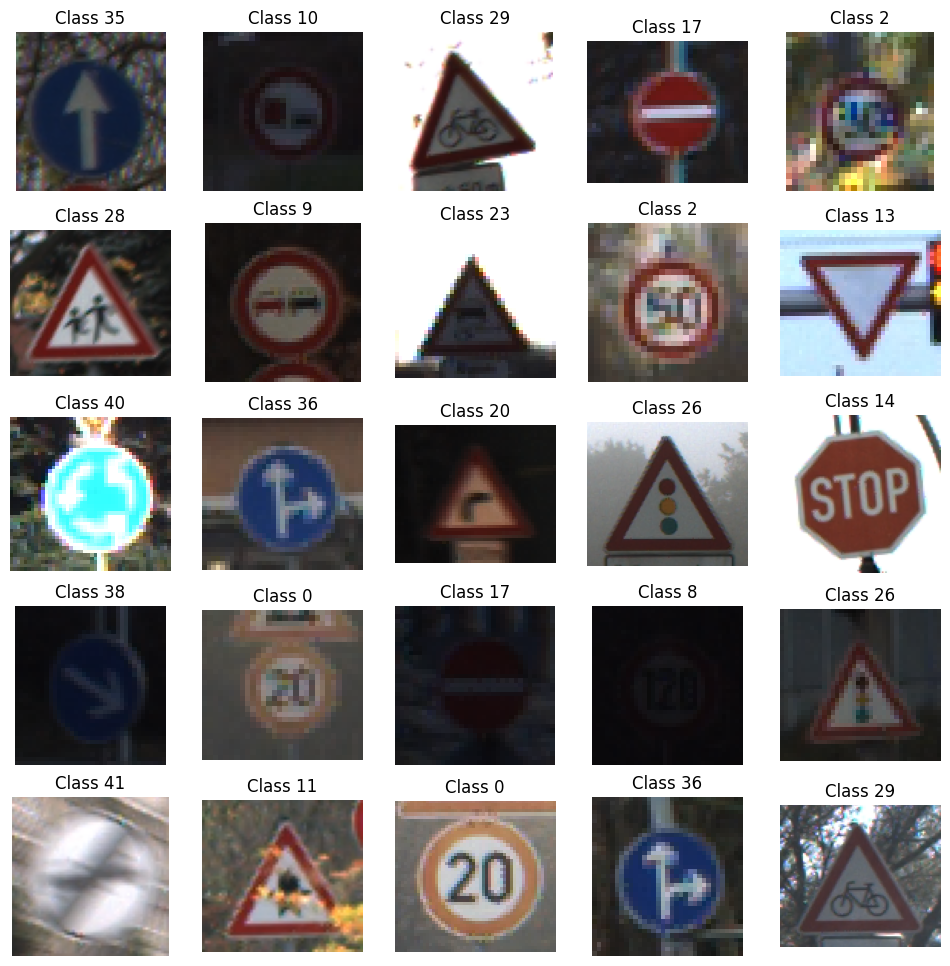

In [12]:
import random

plt.figure(figsize=(12,12))
for i in range(25):
    c = random.choice(classes)
    folder = os.path.join(data_dir, c)
    filename = random.choice(os.listdir(folder))
    
    img = Image.open(os.path.join(folder, filename))
    
    plt.subplot(5,5,i+1)
    plt.imshow(img)
    plt.title(f"Class {c}")
    plt.axis('off')

plt.show()


Now want to inspect 5 random images from each of the 43 classes

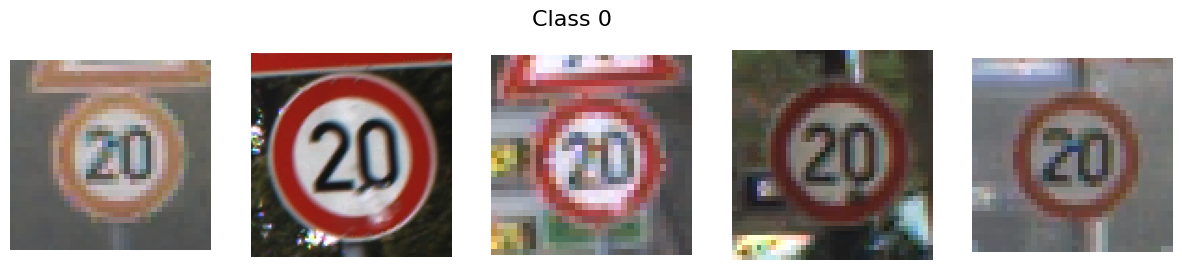

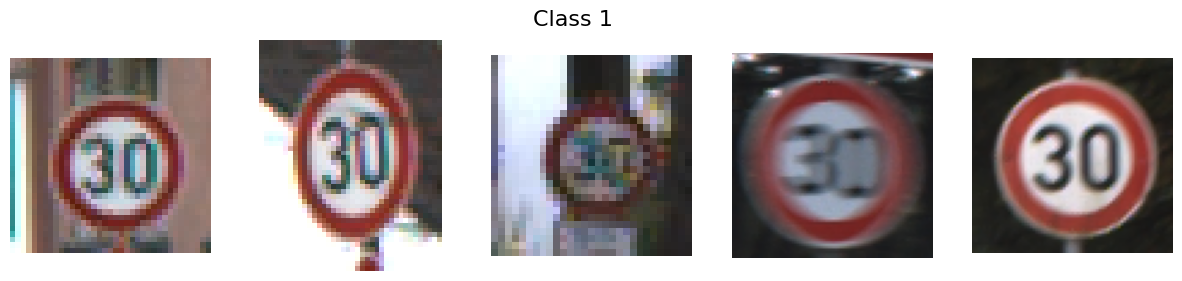

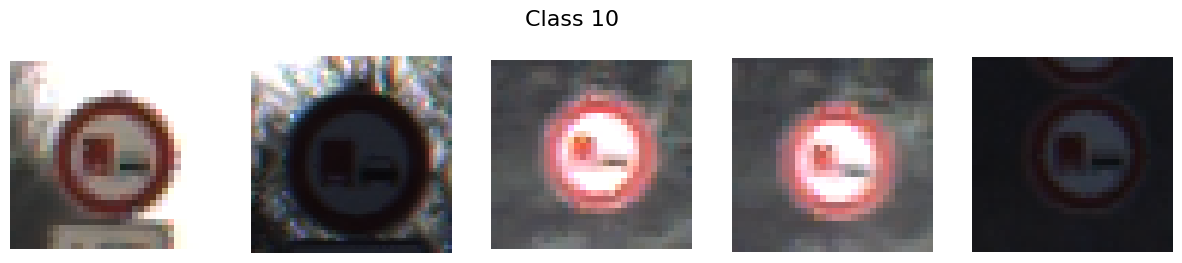

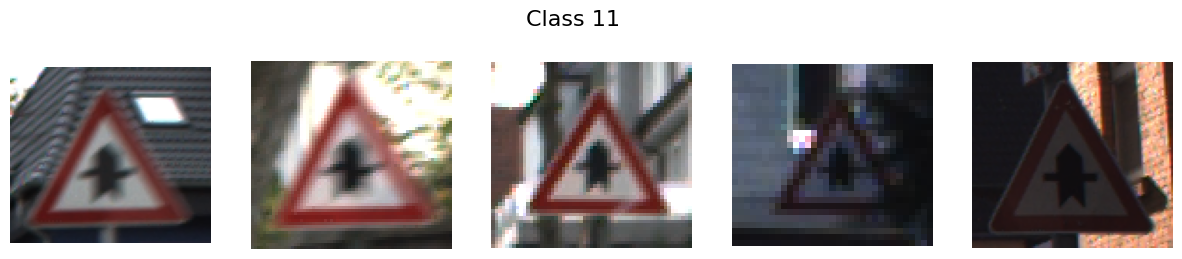

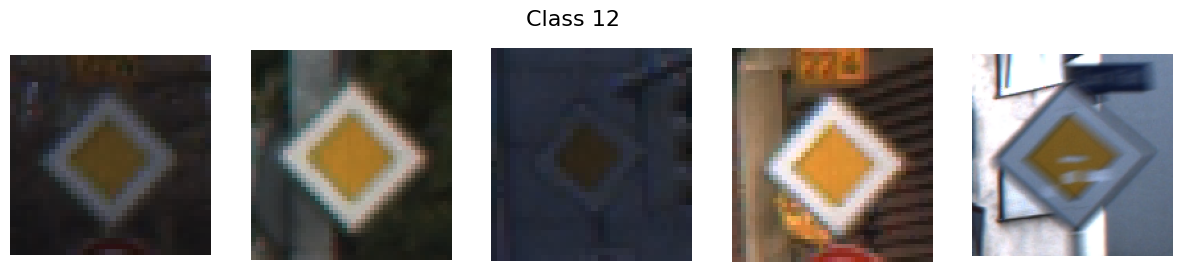

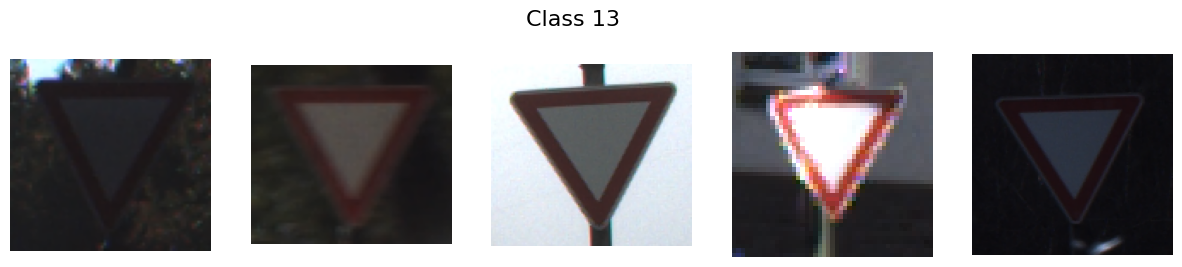

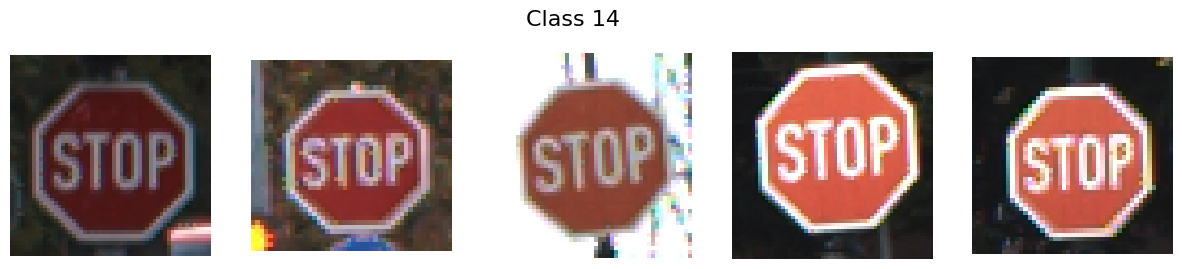

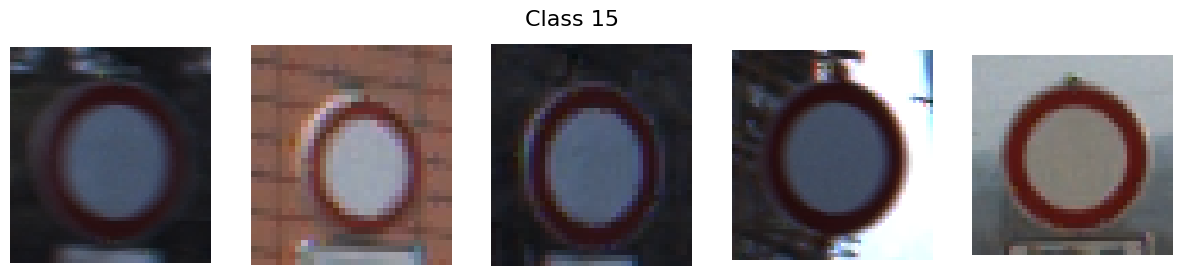

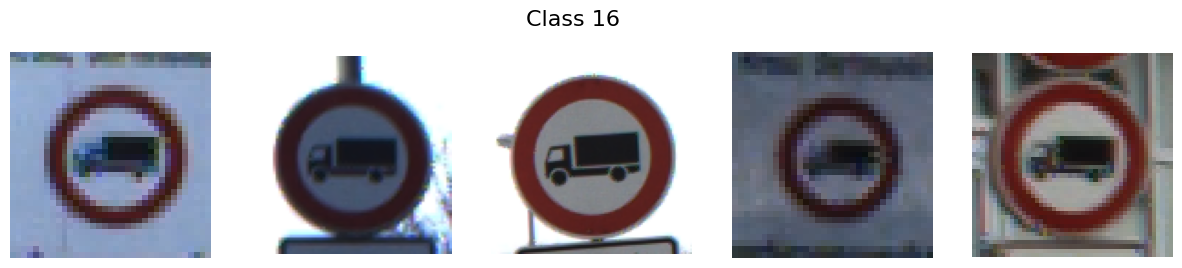

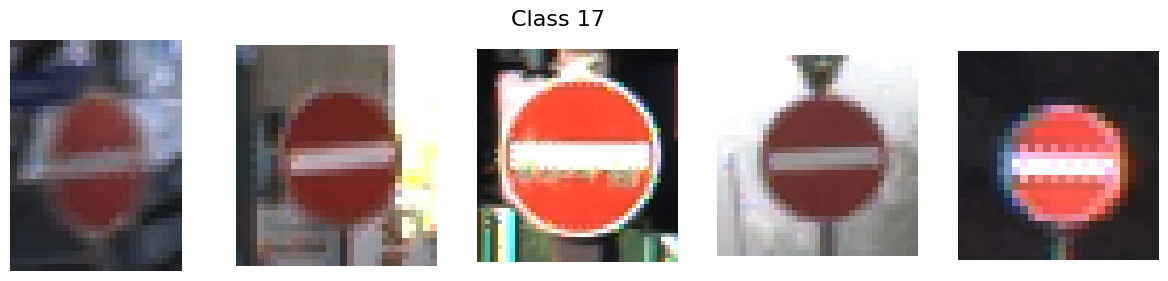

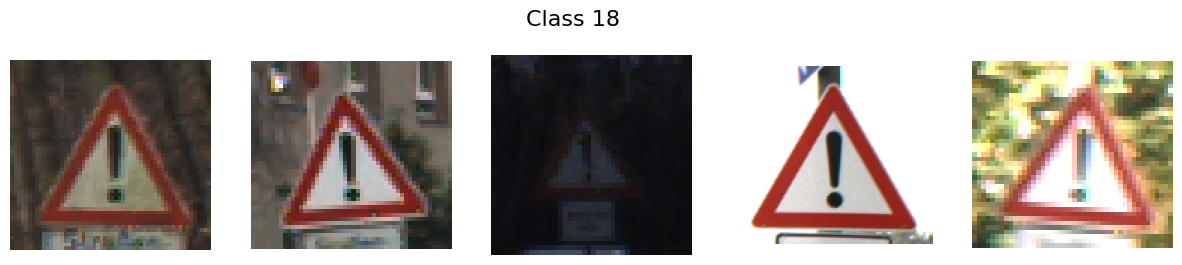

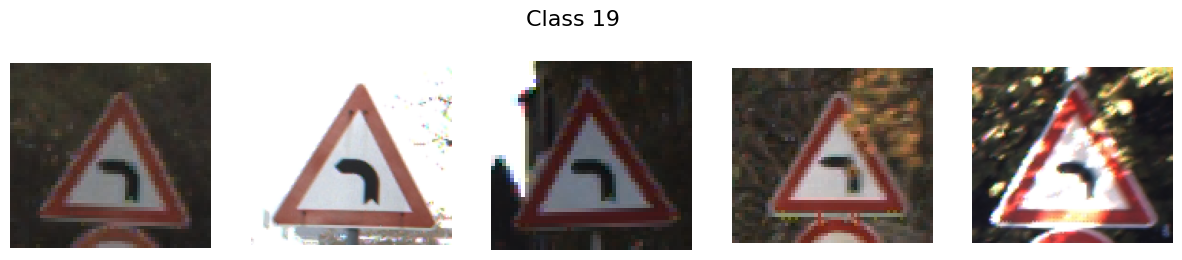

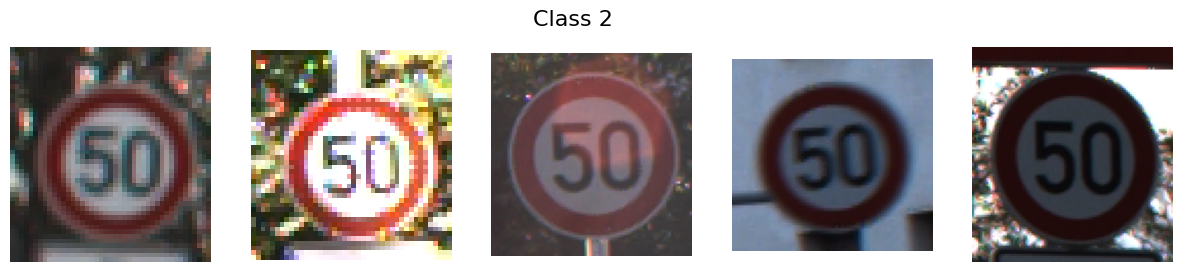

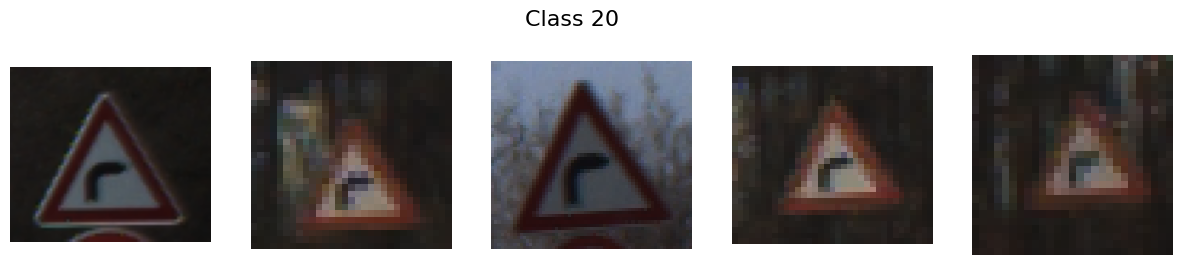

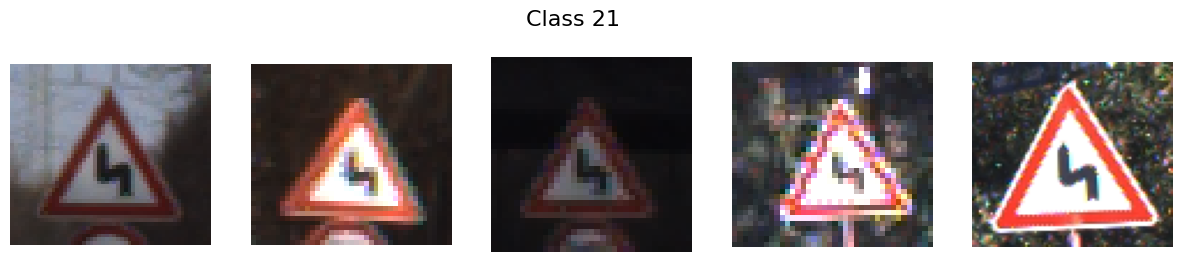

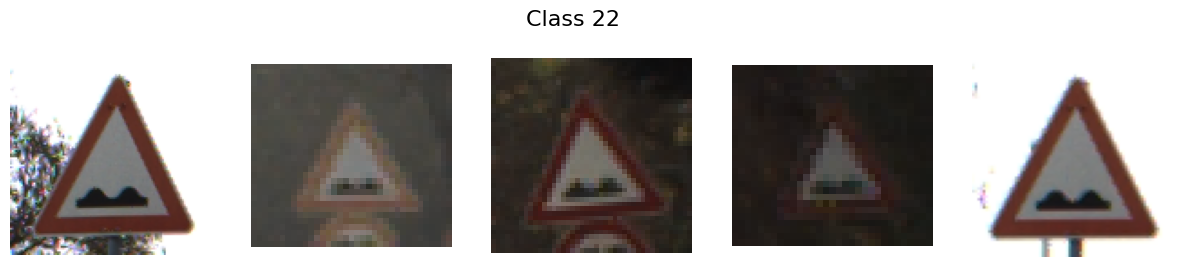

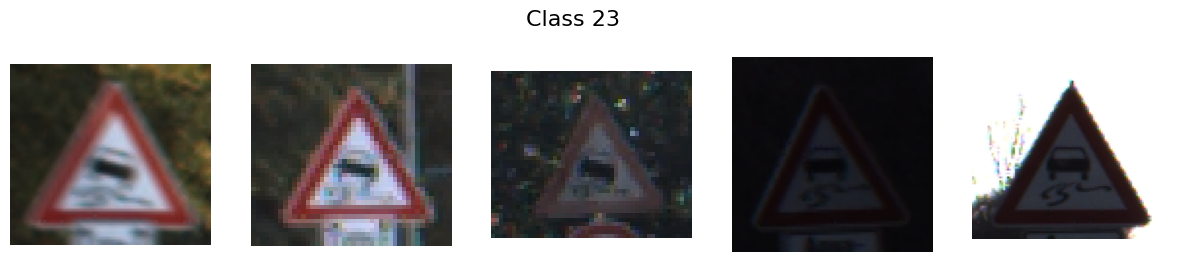

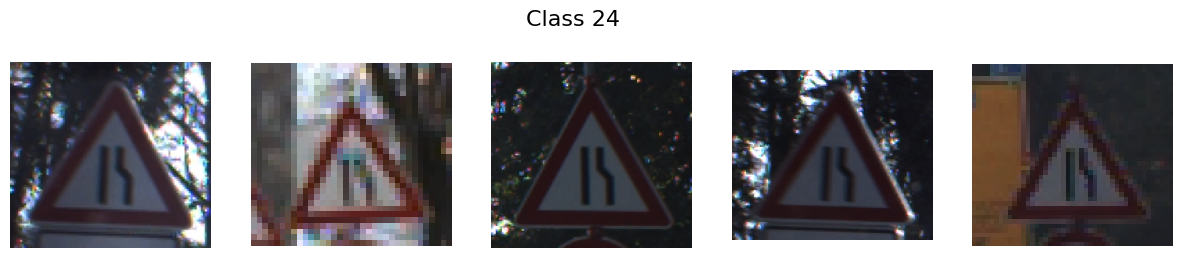

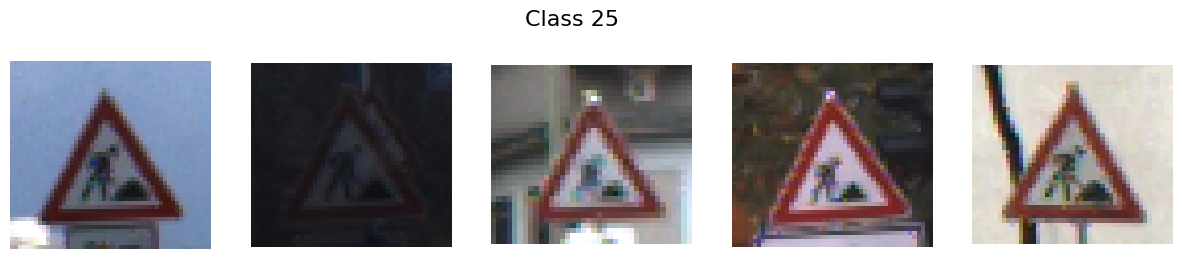

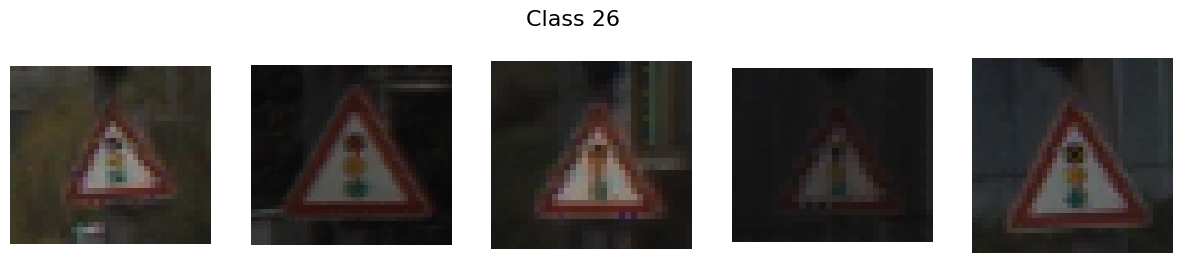

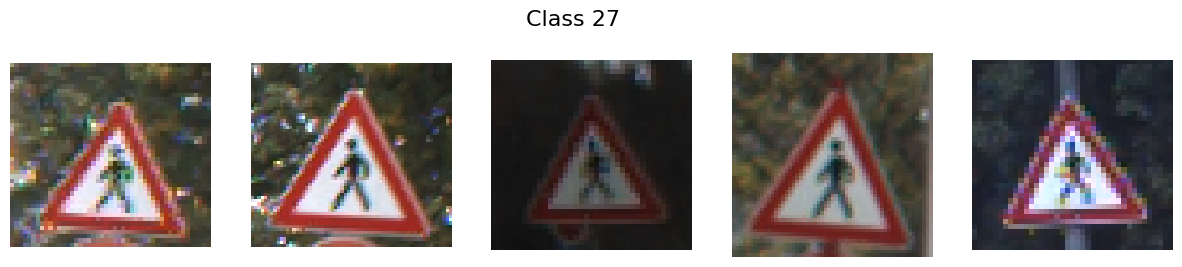

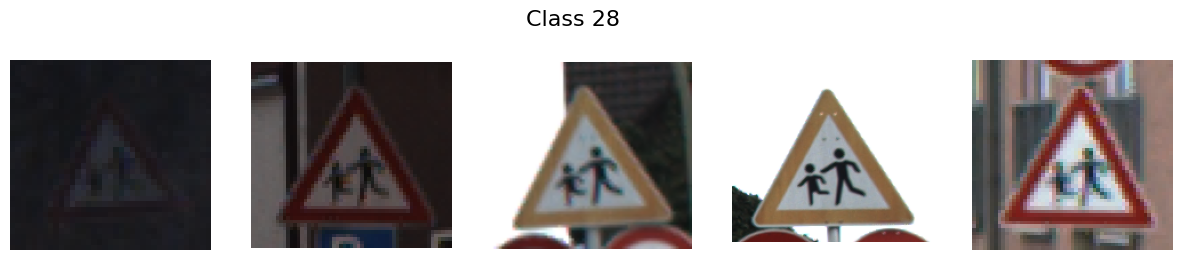

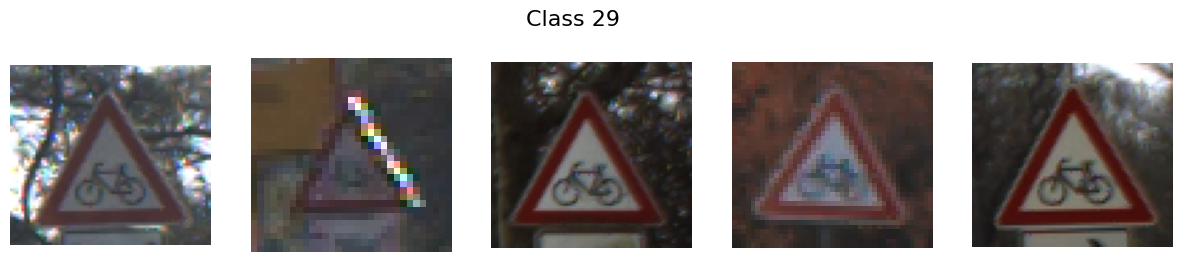

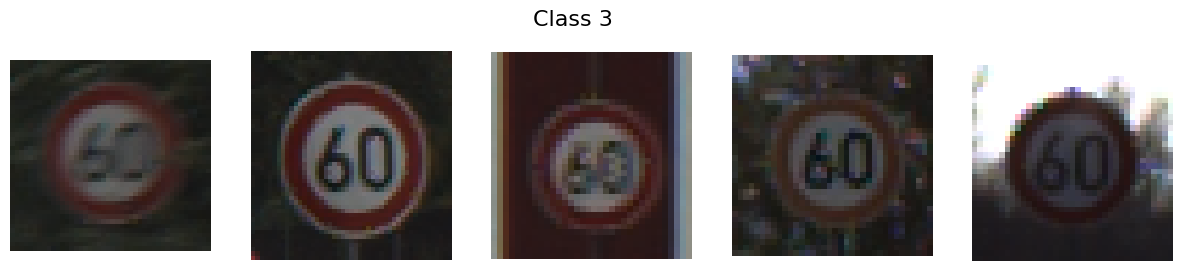

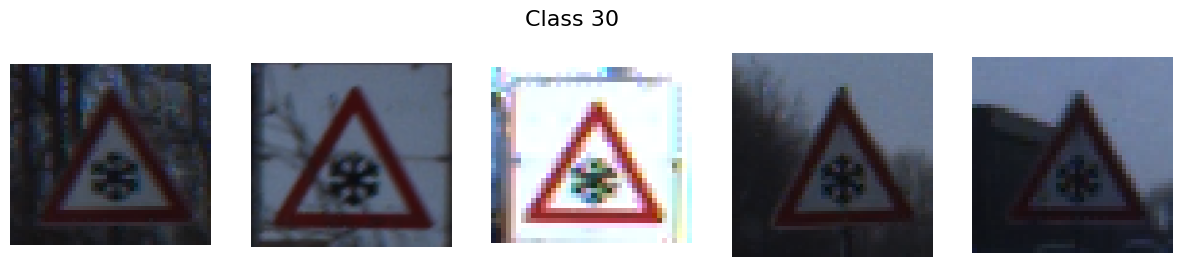

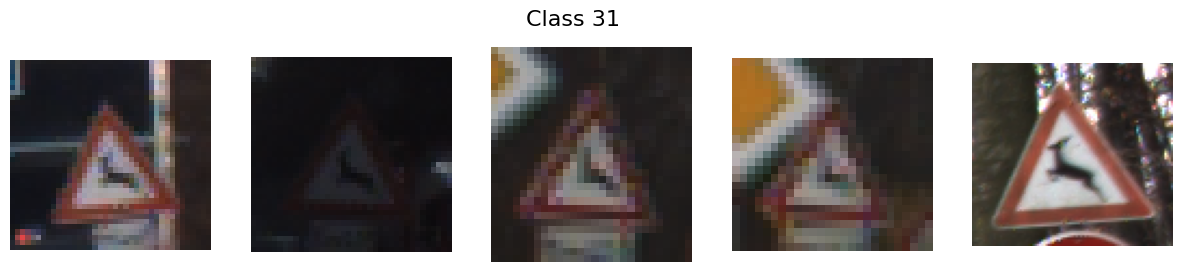

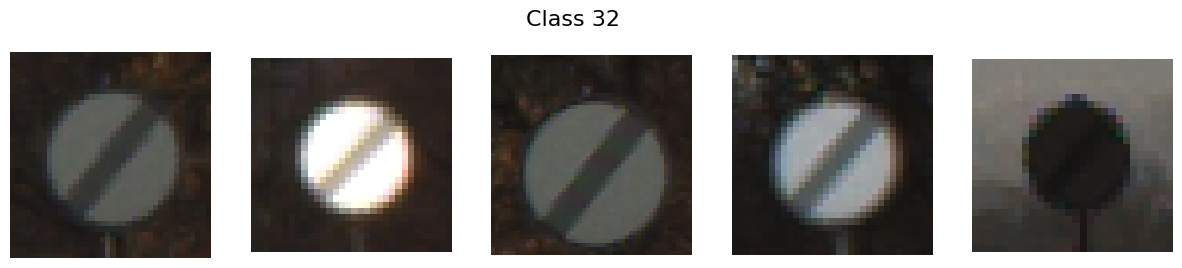

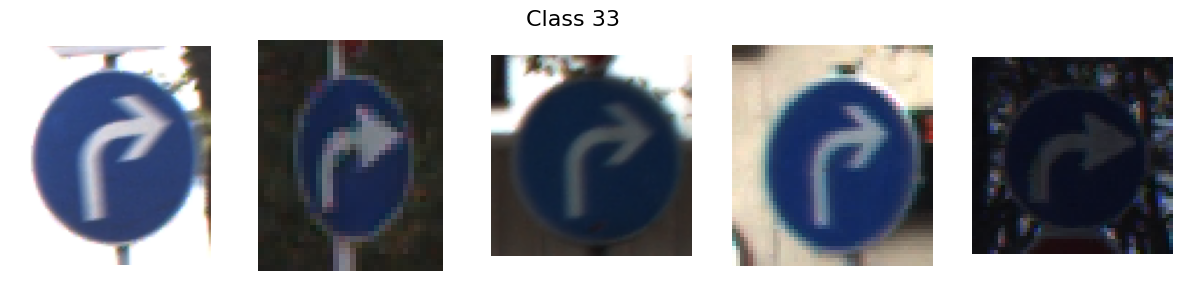

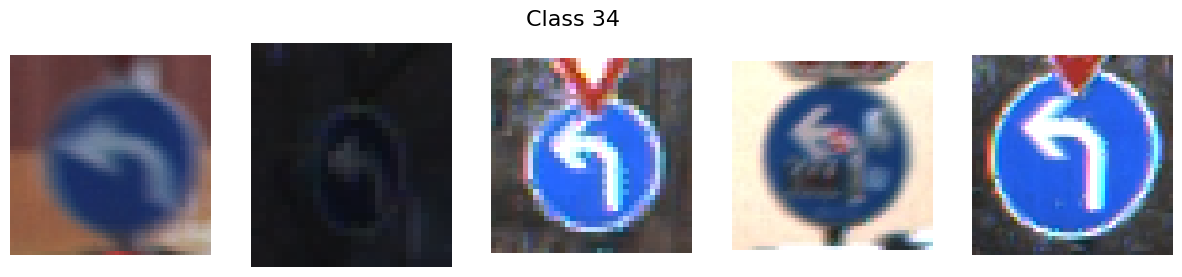

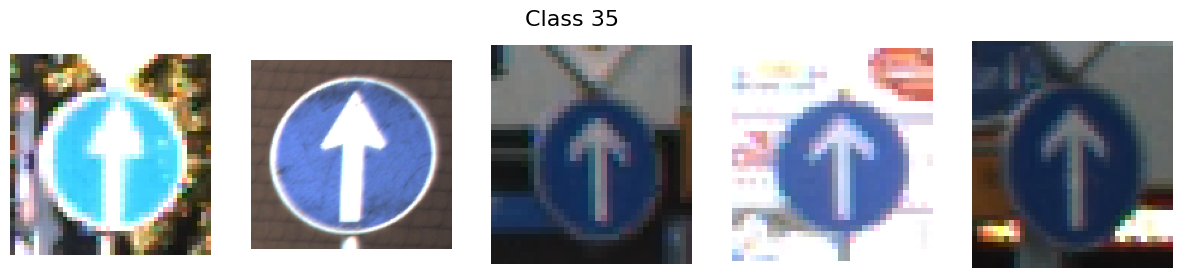

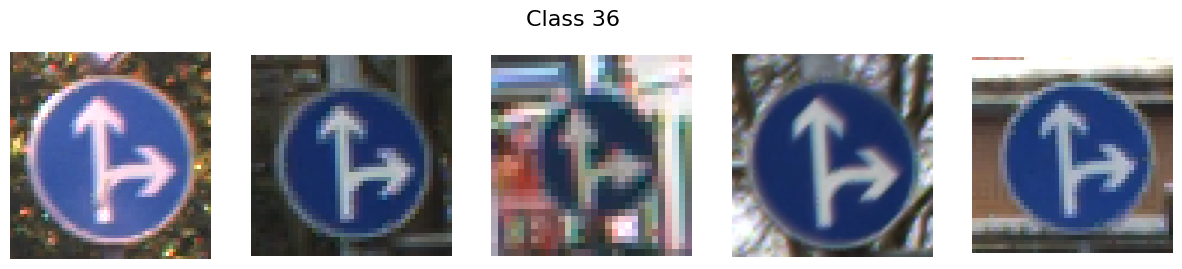

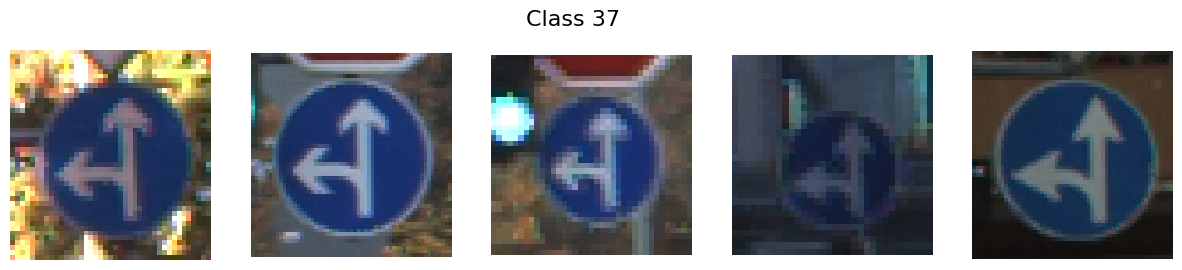

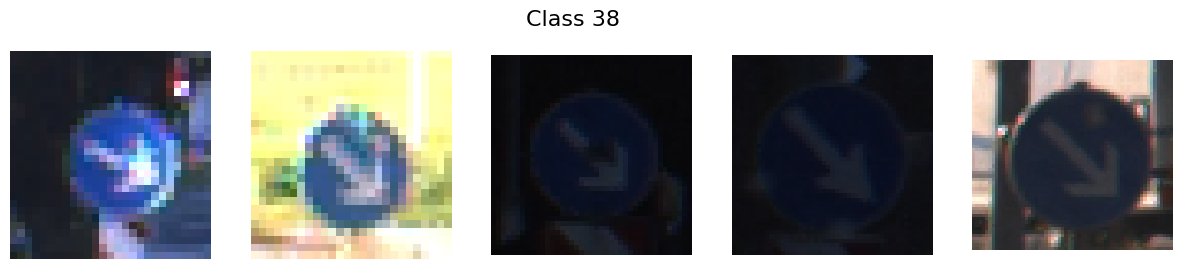

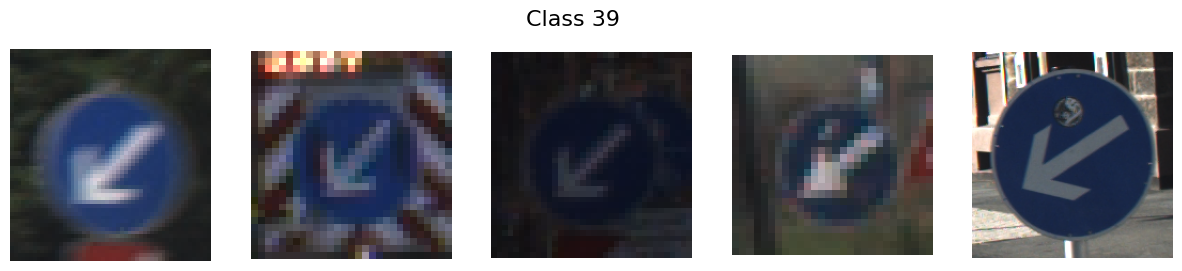

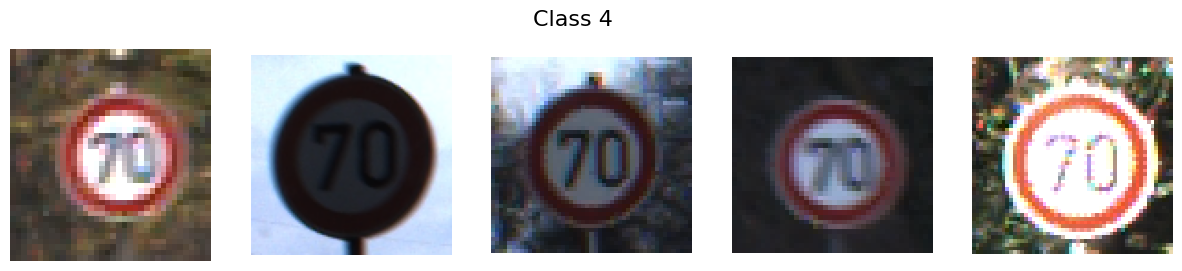

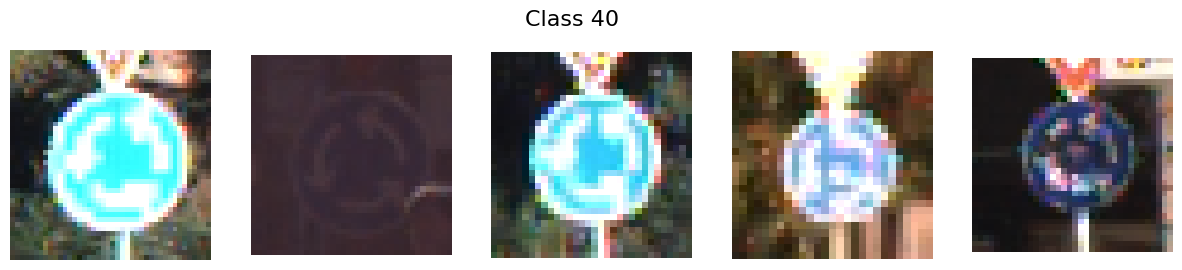

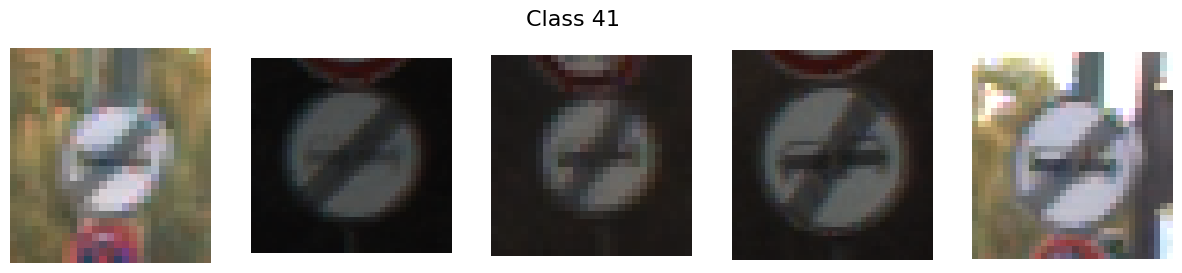

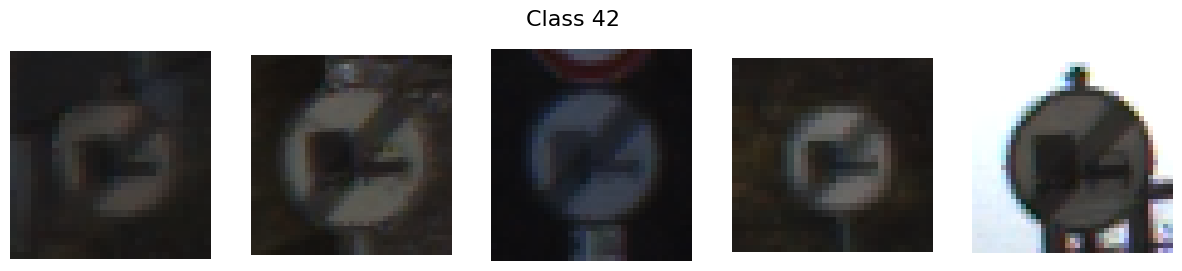

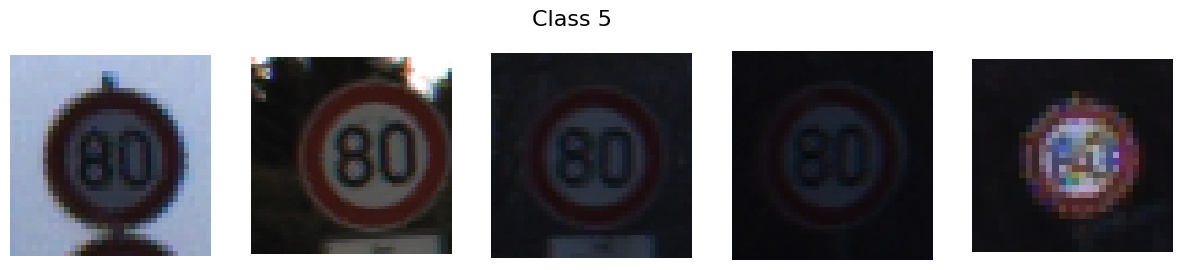

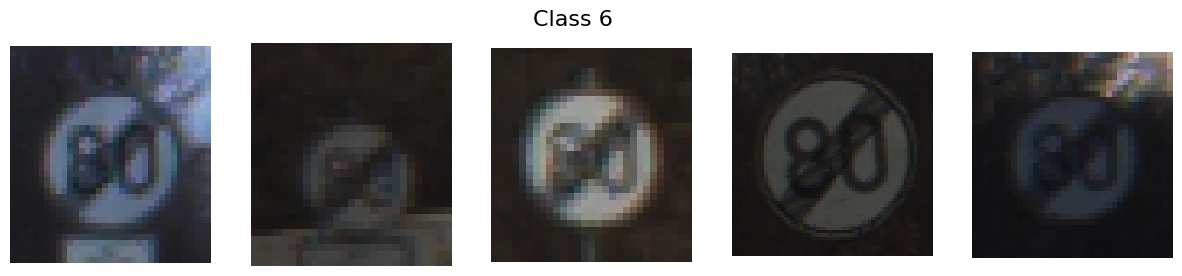

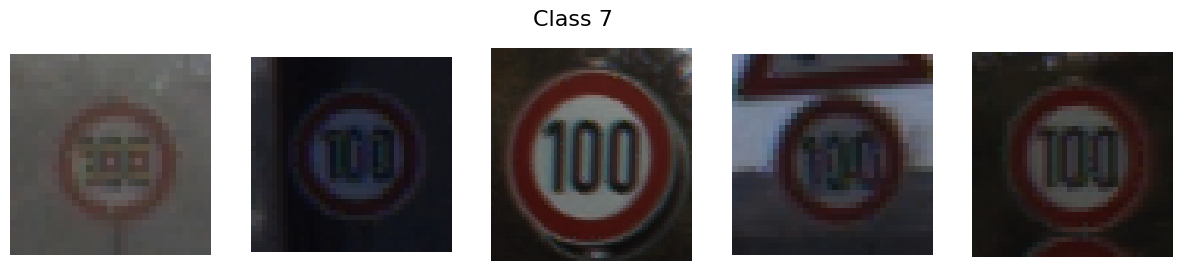

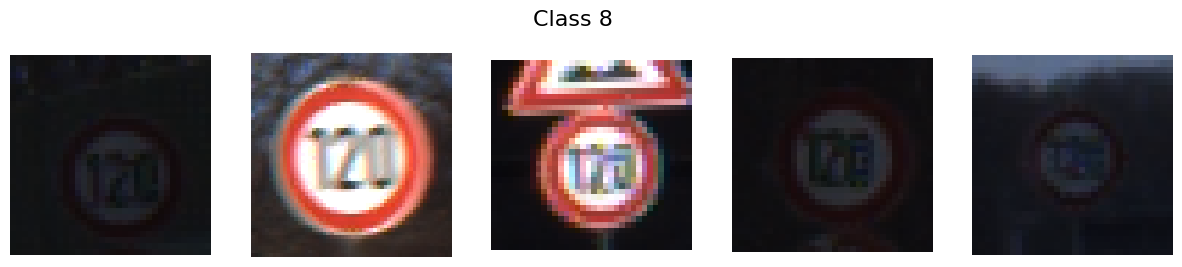

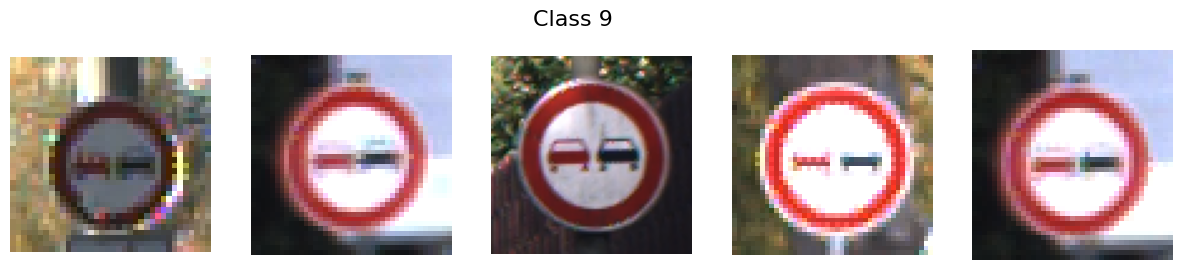

In [13]:
random.seed(42)

for c in classes:
    folder = os.path.join(data_dir, c)
    filenames = os.listdir(folder)
    
    sample_files = random.sample(filenames, min(5, len(filenames)))
    
    # Plot images
    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class {c}", fontsize=16)
    
    for i, f in enumerate(sample_files):
        img_path = os.path.join(folder, f)
        img = Image.open(img_path)
        
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.axis("off")
    
    plt.show()

Can see irregularities in brightness, rotation, blur, angle? quality etc


i want to look at pixel distributions to see if most of the photos are dark/light etc - this will help us decide how to edit the dataset - data augmentation. first here is how we look at a plot of the pixels of one sign. pixels are 0-255 (0 =dark) --- for a batch of images a histogram tells us if the photos are dim or well-lit overall and if the data set is consistent or highly variable. 

maybe look at how pixel distributions vary accross classes


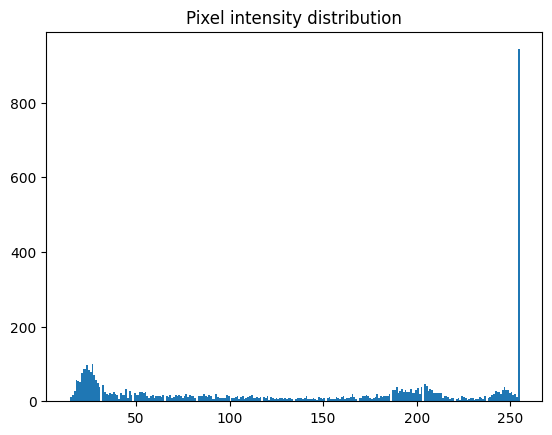

In [14]:
img = np.array(img) 
plt.hist(img.ravel(), bins=255)
plt.title("Pixel intensity distribution")
plt.show()

following should take loads of images - 200-500 and flatten them all into one big list and then plot a histogram. 

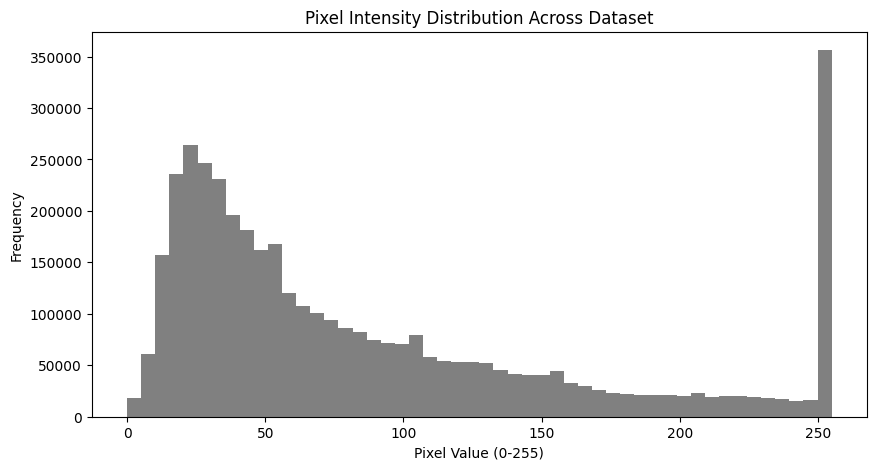

In [15]:
random.seed(42)
np.random.seed(42)

pixel_values = []

# take up to 10 random images from each class
for c in classes:
    folder = os.path.join(data_dir, c)
    filenames = os.listdir(folder)
    sample_files = random.sample(filenames, min(10, len(filenames)))
    
    for f in sample_files:
        img = Image.open(os.path.join(folder, f)).convert('RGB')
        img_array = np.array(img)
        pixel_values.extend(img_array.flatten())

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(pixel_values, bins=50, color='gray')
plt.title("Pixel Intensity Distribution Across Dataset")
plt.xlabel("Pixel Value (0-255)")
plt.ylabel("Frequency")
plt.show()


In [16]:
pixels = np.array(pixel_values)

# Compute more statistics
print("Min pixel value:", np.min(pixels))
print("25th percentile:", np.percentile(pixels, 25))
print("Median (50th percentile):", np.median(pixels))
print("75th percentile:", np.percentile(pixels, 75))
print("Max pixel value:", np.max(pixels))
print("Mean pixel value:", np.mean(pixels))
print("Standard deviation:", np.std(pixels))

Min pixel value: 0
25th percentile: 31.0
Median (50th percentile): 61.0
75th percentile: 128.0
Max pixel value: 255
Mean pixel value: 89.46135357293508
Standard deviation: 75.14897208848411


now we have data on the pixel distribution in a sample of images - we can do augmentation.
to be hoenst there are so many images in each categrory i don't even know if this is necessary.

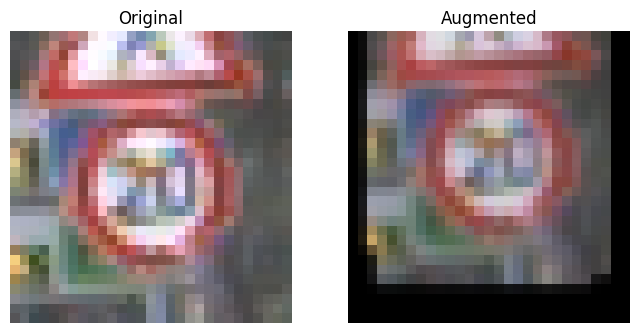

In [18]:
random.seed(42)
np.random.seed(42)

def augment_image(img):
    # Rotation ±10°
    angle = random.uniform(-10, 10)
    img = img.rotate(angle)

    # Random horizontal and vertical shift (10% max)
    max_shift_x = int(0.1 * img.width)
    max_shift_y = int(0.1 * img.height)
    shift_x = random.randint(-max_shift_x, max_shift_x)
    shift_y = random.randint(-max_shift_y, max_shift_y)
    img = img.transform(img.size, Image.AFFINE, (1, 0, shift_x, 0, 1, shift_y))

    # Random zoom/crop ±10%
    zoom_factor = random.uniform(0.9, 1.1)
    w, h = img.size
    new_w, new_h = int(w * zoom_factor), int(h * zoom_factor)
    img = img.resize((new_w, new_h), Image.BILINEAR)
    img = img.crop((0, 0, w, h))  # crop or pad back to original size

    # Brightness adjustment ±20%
    enhancer = ImageEnhance.Brightness(img)
    factor = random.uniform(0.8, 1.2)
    img = enhancer.enhance(factor)

    return img

class_folder = os.path.join(data_dir, "0")
image_files = [f for f in os.listdir(class_folder) 
               if f.lower().endswith(('.png', '.jpg', '.jpeg', '.ppm'))]

sample_path = os.path.join(class_folder, image_files[0])
img1 = Image.open(sample_path)

aug_img1 = augment_image(img1)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(img1)
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(aug_img1)
plt.title("Augmented")
plt.axis("off")
plt.show()